In [1]:
import gym
from gym import logger as gymlogger
gymlogger.set_level(40)

import random
import numpy as np
from collections import namedtuple, deque

from IPython import display
import matplotlib.pyplot as plt

from agent import *

In [3]:
env = gym.make('LunarLander-v2')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
print('State shape: ', state_size)
print('Number of actions: ', action_size)

State shape:  8
Number of actions:  4


### 1. PER DQN

In [17]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 16         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 0.001             # for soft update of target parameters
LR = 1e-3               # learning rate
UPDATE_EVERY = 1        # how often to update the target network
LEARN_NUM = 1

In [18]:
NUM_EPISODES = 1000
PRINT_EVERY = 50

TMAX = 1000
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.995

agent = PERAgent(8, 4, "double dqn")

eps = eps_start
score_list = []
for e in range(1, NUM_EPISODES+1):
    state = env.reset()
    score = 0
    for t in range(TMAX):
        action = agent.get_action(state, eps)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
            
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    score_list.append(score)
    
    print('\rEpisode {}...sum of rewards {:.2f}...eps {:.6f}...'.format(e, score, eps), end = "")
    if e % PRINT_EVERY == 0:
        print('\rEpisode {}...sum of rewards {:.2f}...eps {:.6f}...'.format(e, score, eps))

score_list2 = score_list

Episode 16...sum of rewards -161.87...eps 0.922931...

KeyboardInterrupt: 

### 1. DQN

In [15]:
NUM_EPISODES = 10
PRINT_EVERY = 50

TMAX = 1000
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.995

agent = Agent(8, 4, "dqn")

eps = eps_start
score_list = []
for e in range(1, NUM_EPISODES+1):
    state = env.reset()
    score = 0
    for t in range(TMAX):
        action = agent.get_action(state, eps)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
            
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    score_list.append(score)
    
    print('\rEpisode {}...sum of rewards {:.2f}...eps {:.6f}...'.format(e, score, eps), end = "")
    if e % PRINT_EVERY == 0:
        print('\rEpisode {}...sum of rewards {:.2f}...eps {:.6f}...'.format(e, score, eps))


Episode 10...sum of rewards -152.76...eps 0.951110...

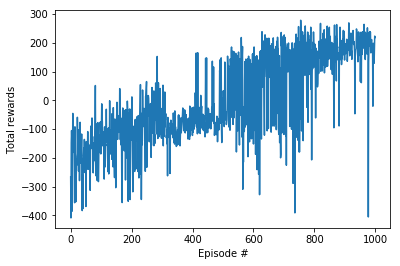

In [20]:
score_list1 = score_list

fig = plt.figure()
plt.plot(np.arange(len(score_list1)), score_list1, label = "DQN")
plt.ylabel('Total rewards')
plt.xlabel('Episode #')
plt.show()

### 2. double DQN

In [16]:
NUM_EPISODES = 10
PRINT_EVERY = 50

TMAX = 1000
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.995

agent = Agent(8, 4, "double dqn")

eps = eps_start
score_list = []
for e in range(1, NUM_EPISODES+1):
    state = env.reset()
    score = 0
    for t in range(TMAX):
        action = agent.get_action(state, eps)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
            
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    score_list.append(score)
    
    print('\rEpisode {}...sum of rewards {:.2f}...eps {:.6f}...'.format(e, score, eps), end = "")
    if e % PRINT_EVERY == 0:
        print('\rEpisode {}...sum of rewards {:.2f}...eps {:.6f}...'.format(e, score, eps))

score_list2 = score_list

Episode 10...sum of rewards -194.94...eps 0.951110...

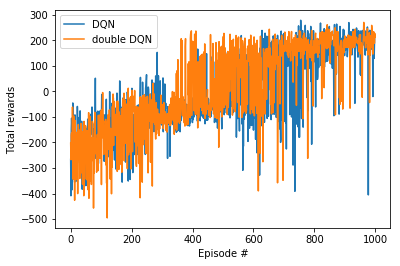

In [22]:
fig = plt.figure()
plt.plot(np.arange(len(score_list1)), score_list1, label = "DQN")
plt.plot(np.arange(len(score_list2)), score_list2, label = "double DQN")
plt.ylabel('Total rewards')
plt.xlabel('Episode #')
plt.legend()
plt.show()